# Tutorial - Using pyam for TIMES Ireland scenario analysis

This tutorial notebook illustrates how the Python package [pyam](https://pyam-iamc.readthedocs.io) can be used
to analyse and visualize the scenario data provided in this repository.

To run this notebook, please install pyam and the [frictionless](https://framework.frictionlessdata.io) package.

```
pip install pyam-iamc frictionless
```

*Note that the pyam package is distributed under the name "pyam-iamc" on pypi.org!*

In [33]:
import pyam
import frictionless

## Import the TIMES Ireland scenario data

We import the scenario data in this repository by parsing the `datapackage.json` file.

In [34]:
package = frictionless.Package("datapackage.json")

Next, we inspect the list of resources (i.e., data tables) included in this datapackage.  
Because this list is quite long, we only show resources related to the power sector.

In [35]:
[i for i in package.resource_names if "pwr" in i]

['pwr_cap-n', 'pwr_cap', 'pwr_emissions-co2', 'pwr_gen-elcc', 'pwr_gen-hetc']

We now define a utility function to translate a resource from the datapackage
to an [IamDataFrame](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html).

In [36]:
def to_iamdataframe(package, resource, model="TIMES-Ireland", region="Ireland"):
    """Parse a resource datatable as IamDataFrame
    
    Parameters
    ----------
    package : :class:`frictionless.Package`
        A frictionless datapackage
    resource : str
        A resource in `package`
    model : str, optional
        The model name to be used in the returned :class:`IamDataFrame`
    region : str, optional
        The region name to be used in the returned :class:`IamDataFrame`
    
    Returns
    -------
        :class:`IamDataFrame`
    """
    _resource = package.get_resource(resource)

    # extract unit from schema fields
    for field in _resource["schema"]["fields"]:
        if field.name == "value":
            unit = field["unit"]
            break
    
    # mapping of column names to the IAMC format
    mapping = dict(scenario="scenarioName", variable="seriesName", year="period")
    
    return pyam.IamDataFrame(
        data=_resource.to_pandas(),
        model=model,
        region=region,
        unit=unit,
        **mapping,
    )

We use the utility function to read the datatable relating to CO2 emissions from the power sector,
and display an overview of the returned **IamDataFrame**.

In [37]:
df = to_iamdataframe(package, "pwr_emissions-co2")
df

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : TIMES-Ireland (1)
 * scenario : Mitigation_CAP21_A25E65, ... No_Mitigation (57)
Timeseries data coordinates:
   region   : Ireland (1)
   variable : PWR-BIO-CCS, PWR-COA, PWR-GAS, PWR-GAS-CCS, PWR-MSW, ... PWR-PEA (7)
   unit     : kt (1)
   year     : 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, ... 2050 (33)
Meta indicators:
   exclude (bool) False (1)

Next, we show a simple line plot of the emissions in the "No_Mitigation" scenario...

<AxesSubplot:title={'center':'model: TIMES-Ireland - scenario: No_Mitigation - region: Ireland'}, xlabel='Year', ylabel='kt'>

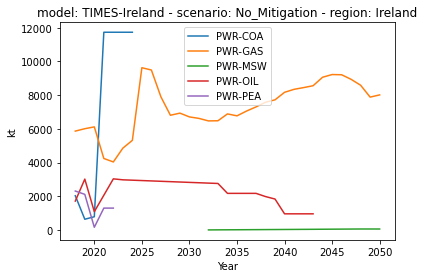

In [38]:
df.filter(scenario="No_Mitigation").plot()

As a last step (for now), we compute the aggregate emissions from the power sector and plot them for all scenarios.

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'model: TIMES-Ireland - region: Ireland - variable: CO2 Emissions'}, xlabel='Year', ylabel='kt'>

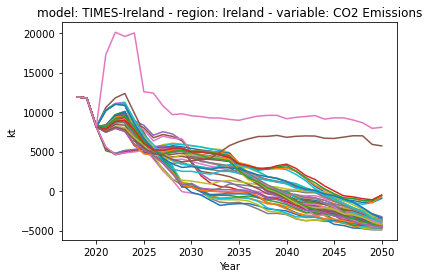

In [39]:
df.aggregate("CO2 Emissions", components=df.variable).plot()